**DATA SCIENCE INTERNSHIP**

**TASK 2 :** Stock Market Prediction and Forecasting using Stacked LSTM

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas_datareader as pdr
key="" 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

**READING THE DATA**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


**ANALYSIS OF DATA SET**

In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data1=data.reset_index()['Close']
print(data1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [ ]:
data_open= data.iloc[:, 1:2].values

**TRAINING THE MODEL**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
data_open_scaled= ss.fit_transform(data_open)

In [ ]:
data_open_scaled[60]

array([0.77007299])

In [ ]:
xdata=[]
ydata=[]
for i in range(60,len(data_open_scaled)):
    xdata.append(data_open_scaled[i-60:i,0])
    ydata.append(data_open_scaled[i,0])

xdata, ydata = np.array(data), np.array(ydata)

In [ ]:
xdata= np.reshape(xdata,(xdata.shape[0],xdata.shape[1],1))

xdata.shape

(2035, 8, 1)

##  Long Short-Term Memory: 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
print(data1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [ ]:
print(training_size)
print(test_size)
print(train_data,test_data)

1322
713
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.25347222]
 [0.26041667]
 [0.2563317 ]] [[0.24652778]
 [0.23611111]
 [0.25204248]
 [0.25919118]
 [0.25776144]
 [0.2681781 ]
 [0.25449346]
 [0.27103758]
 [0.24530229]
 [0.26756536]
 [0.27267157]
 [0.26633987]
 [0.27410131]
 [0.28615196]
 [0.27818627]
 [0.27205882]
 [0.27124183]
 [0.27798203]
 [0.27083333]
 [0.25857843]
 [0.24285131]
 [0.2250817 ]
 [0.23447712]
 [0.24346405]
 [0.23611111]
 [0.22937092]
 [0.21527778]
 [0.20976307]
 [0.20751634]
 [0.2060866 ]
 [0.20445261]
 [0.20098039]
 [0.21180556]
 [0.19301471]
 [0.18974673]
 [0.20302288]
 [0.21752451]
 [0.20629085]
 [0.19158497]
 [0.17381536]
 [0.17401961]
 [0.18361928]
 [0.17830882]
 [0.19362745]
 [0.20098039]
 [0.20486111]
 [0.21425654]
 [0.21813725]
 [0.21466503]
 [0.21343954]
 [0.21160131]
 [0.21711601]
 [0.20710784]
 [0.2005719 ]
 [0.20874183]
 [0.18647876]
 [0.19199346]
 [0.1807598 ]
 [0.20935458]
 [0.20792484]
 [0.21425654]
 [0.23366013]
 [0.23304739]
 [0.26184641]
 [0.2

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 266ms/step - loss: 0.0301 - val_loss: 0.0043
Epoch 2/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 4s 209ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 4s 202ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0014 - val_loss: 8.2302e-04
Epoch 10/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0015 - v

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(data1)

2035

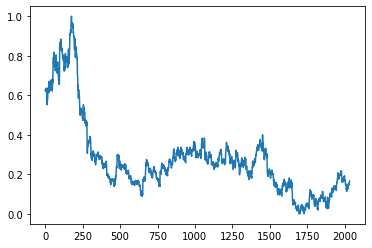

In [ ]:
plt.plot(data1)

**THANK YOU**

**Done By :- MANOJ KUMAR M**